<a href="https://colab.research.google.com/github/mayirichennakesavarao/Elictricity-Bill-Estimation/blob/main/regression_problem_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing packages
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [5]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/csv/Electricity_Bill_Estimation (2).csv')
df.head()

,Customer_ID,Monthly_Consumption_kWh,Region,Tariff_Plan,No_of_Appliances,Payment_Method,Customer_Type,Monthly_Rent,Average_Daily_Usage,Electricity_Bill
0,6fd7ae4d-9567-4896-92f6-d0b884d9d71a,1150.0,Rural,Basic,8,Credit,Residential,949,49,457
1,cffc4a74-ef15-4a92-b2be-0acc7c445f1a,725.0,Rural,Basic,10,Cash,Commercial,1470,82,43
2,262ef808-59e2-4b0e-9899-6ad77046a110,1253.0,Rural,Premium,3,Credit,Commercial,620,4,99
3,6584c232-ad7e-40a4-94d3-fd099e4c00cb,1583.0,Rural,Premium,9,Online,Commercial,311,90,451
4,09e38b63-9ea6-4d4b-b191-68997505bb11,537.0,Suburban,Premium,6,Cash,Commercial,374,57,303


In [6]:
# See the no. of rows and columns
df.shape

(750, 10)

In [7]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Customer_ID', 'Monthly_Consumption_kWh', 'Region', 'Tariff_Plan', 'No_of_Appliances', 'Payment_Method', 'Customer_Type', 'Monthly_Rent', 'Average_Daily_Usage', 'Electricity_Bill']


In [8]:
# Display data type of each feature
df.dtypes

,0
Customer_ID,object
Monthly_Consumption_kWh,float64
Region,object
Tariff_Plan,object
No_of_Appliances,int64
Payment_Method,object
Customer_Type,object
Monthly_Rent,int64
Average_Daily_Usage,int64
Electricity_Bill,int64


In [9]:
df.describe()

,Monthly_Consumption_kWh,No_of_Appliances,Monthly_Rent,Average_Daily_Usage,Electricity_Bill
count,693.000000,750.000000,750.000000,750.000000,750.000000
mean,1009.412698,7.501333,897.473333,51.321333,253.646667
std,558.645324,4.037127,343.181103,27.949066,140.361651
min,55.000000,1.000000,303.000000,1.000000,20.000000
25%,501.000000,4.000000,590.000000,29.000000,131.250000
50%,1002.000000,7.000000,904.000000,52.000000,256.500000
75%,1493.000000,11.000000,1194.000000,76.000000,369.750000
max,1997.000000,14.000000,1499.000000,99.000000,498.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              750 non-null    object 
 1   Monthly_Consumption_kWh  693 non-null    float64
 2   Region                   719 non-null    object 
 3   Tariff_Plan              750 non-null    object 
 4   No_of_Appliances         750 non-null    int64  
 5   Payment_Method           725 non-null    object 
 6   Customer_Type            750 non-null    object 
 7   Monthly_Rent             750 non-null    int64  
 8   Average_Daily_Usage      750 non-null    int64  
 9   Electricity_Bill         750 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 58.7+ KB


In [11]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Monthly_Consumption_kWh,57
Region,31
Tariff_Plan,0
No_of_Appliances,0
Payment_Method,25
Customer_Type,0
Monthly_Rent,0
Average_Daily_Usage,0
Electricity_Bill,0


In [12]:
# Remove unwanted columns
#df.drop(columns=['column1', 'column2'], inplace=True)  # specify the columns to remove

In [14]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
# cat_columns
# num_columns

In [15]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns


In [16]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [17]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [18]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Monthly_Consumption_kWh,0
Region,0
Tariff_Plan,0
No_of_Appliances,0
Payment_Method,0
Customer_Type,0
Monthly_Rent,0
Average_Daily_Usage,0
Electricity_Bill,0


In [19]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [20]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [21]:
df.head()

,Customer_ID,Monthly_Consumption_kWh,Region,Tariff_Plan,No_of_Appliances,Payment_Method,Customer_Type,Monthly_Rent,Average_Daily_Usage,Electricity_Bill
0,321,0.563852,0,0,0.538462,1,1,0.540134,0.489796,0.914226
1,615,0.345005,0,0,0.692308,0,0,0.975753,0.826531,0.048117
2,107,0.616890,0,1,0.153846,1,0,0.265050,0.030612,0.165272
3,288,0.786818,0,1,0.615385,2,0,0.006689,0.908163,0.901674
4,23,0.248198,1,1,0.384615,0,0,0.059365,0.571429,0.592050


In [22]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Electricity_Bill', axis=1)  # -- independent variable
y = df['Electricity_Bill'] # -- dependent variable

In [23]:
df.head()

,Customer_ID,Monthly_Consumption_kWh,Region,Tariff_Plan,No_of_Appliances,Payment_Method,Customer_Type,Monthly_Rent,Average_Daily_Usage,Electricity_Bill
0,321,0.563852,0,0,0.538462,1,1,0.540134,0.489796,0.914226
1,615,0.345005,0,0,0.692308,0,0,0.975753,0.826531,0.048117
2,107,0.616890,0,1,0.153846,1,0,0.265050,0.030612,0.165272
3,288,0.786818,0,1,0.615385,2,0,0.006689,0.908163,0.901674
4,23,0.248198,1,1,0.384615,0,0,0.059365,0.571429,0.592050


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train Logistic Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Evaluate Logistic Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
# Evaluation metrics
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [29]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.08335383452435022
Mean Absolute Error: 0.25291515007021265
R-squared: 0.01707648419602681


In [48]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [50]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.09159089040516327
Mean Absolute Error: 0.2608514644351464
R-squared: -0.08005637084830064


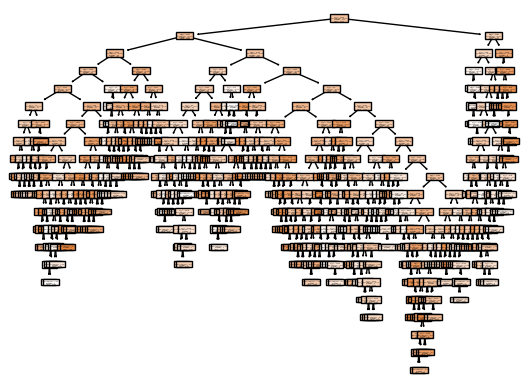

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [52]:
# Select the best model
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [56]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


In [36]:
df.dtypes


,0
Customer_ID,int64
Monthly_Consumption_kWh,float64
Region,int64
Tariff_Plan,int64
No_of_Appliances,float64
Payment_Method,int64
Customer_Type,int64
Monthly_Rent,float64
Average_Daily_Usage,float64
Electricity_Bill,float64


In [37]:
df.head()

,Customer_ID,Monthly_Consumption_kWh,Region,Tariff_Plan,No_of_Appliances,Payment_Method,Customer_Type,Monthly_Rent,Average_Daily_Usage,Electricity_Bill
0,321,0.563852,0,0,0.538462,1,1,0.540134,0.489796,0.914226
1,615,0.345005,0,0,0.692308,0,0,0.975753,0.826531,0.048117
2,107,0.616890,0,1,0.153846,1,0,0.265050,0.030612,0.165272
3,288,0.786818,0,1,0.615385,2,0,0.006689,0.908163,0.901674
4,23,0.248198,1,1,0.384615,0,0,0.059365,0.571429,0.592050
